# Отток клиентов

## Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Нужно Построить модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. 

Проверить F1-меру на тестовой выборке.


## Описание данных

**Признаки**

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

**Целевой признак**

    Exited — факт ухода клиента

## Импортируем библиотеки

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Модели
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split


from sklearn.metrics import f1_score, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams, rcParamsDefault
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle

# Изучение данных

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


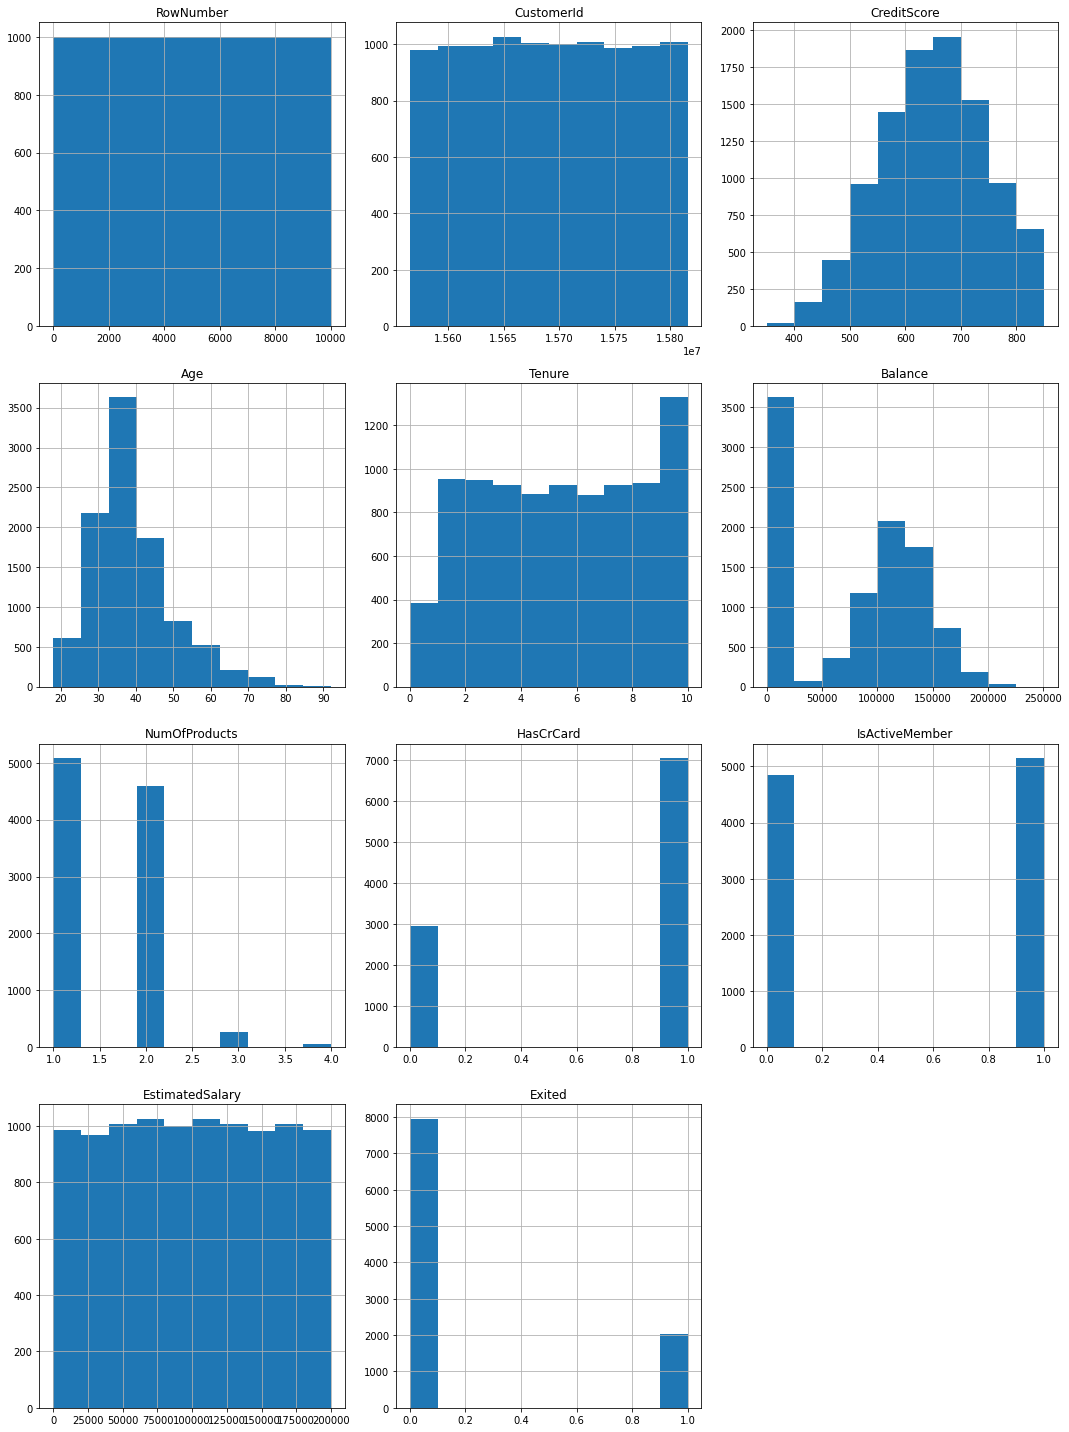

In [6]:
data.hist(figsize=(15, 20))
plt.tight_layout() # убираем служебную информацию

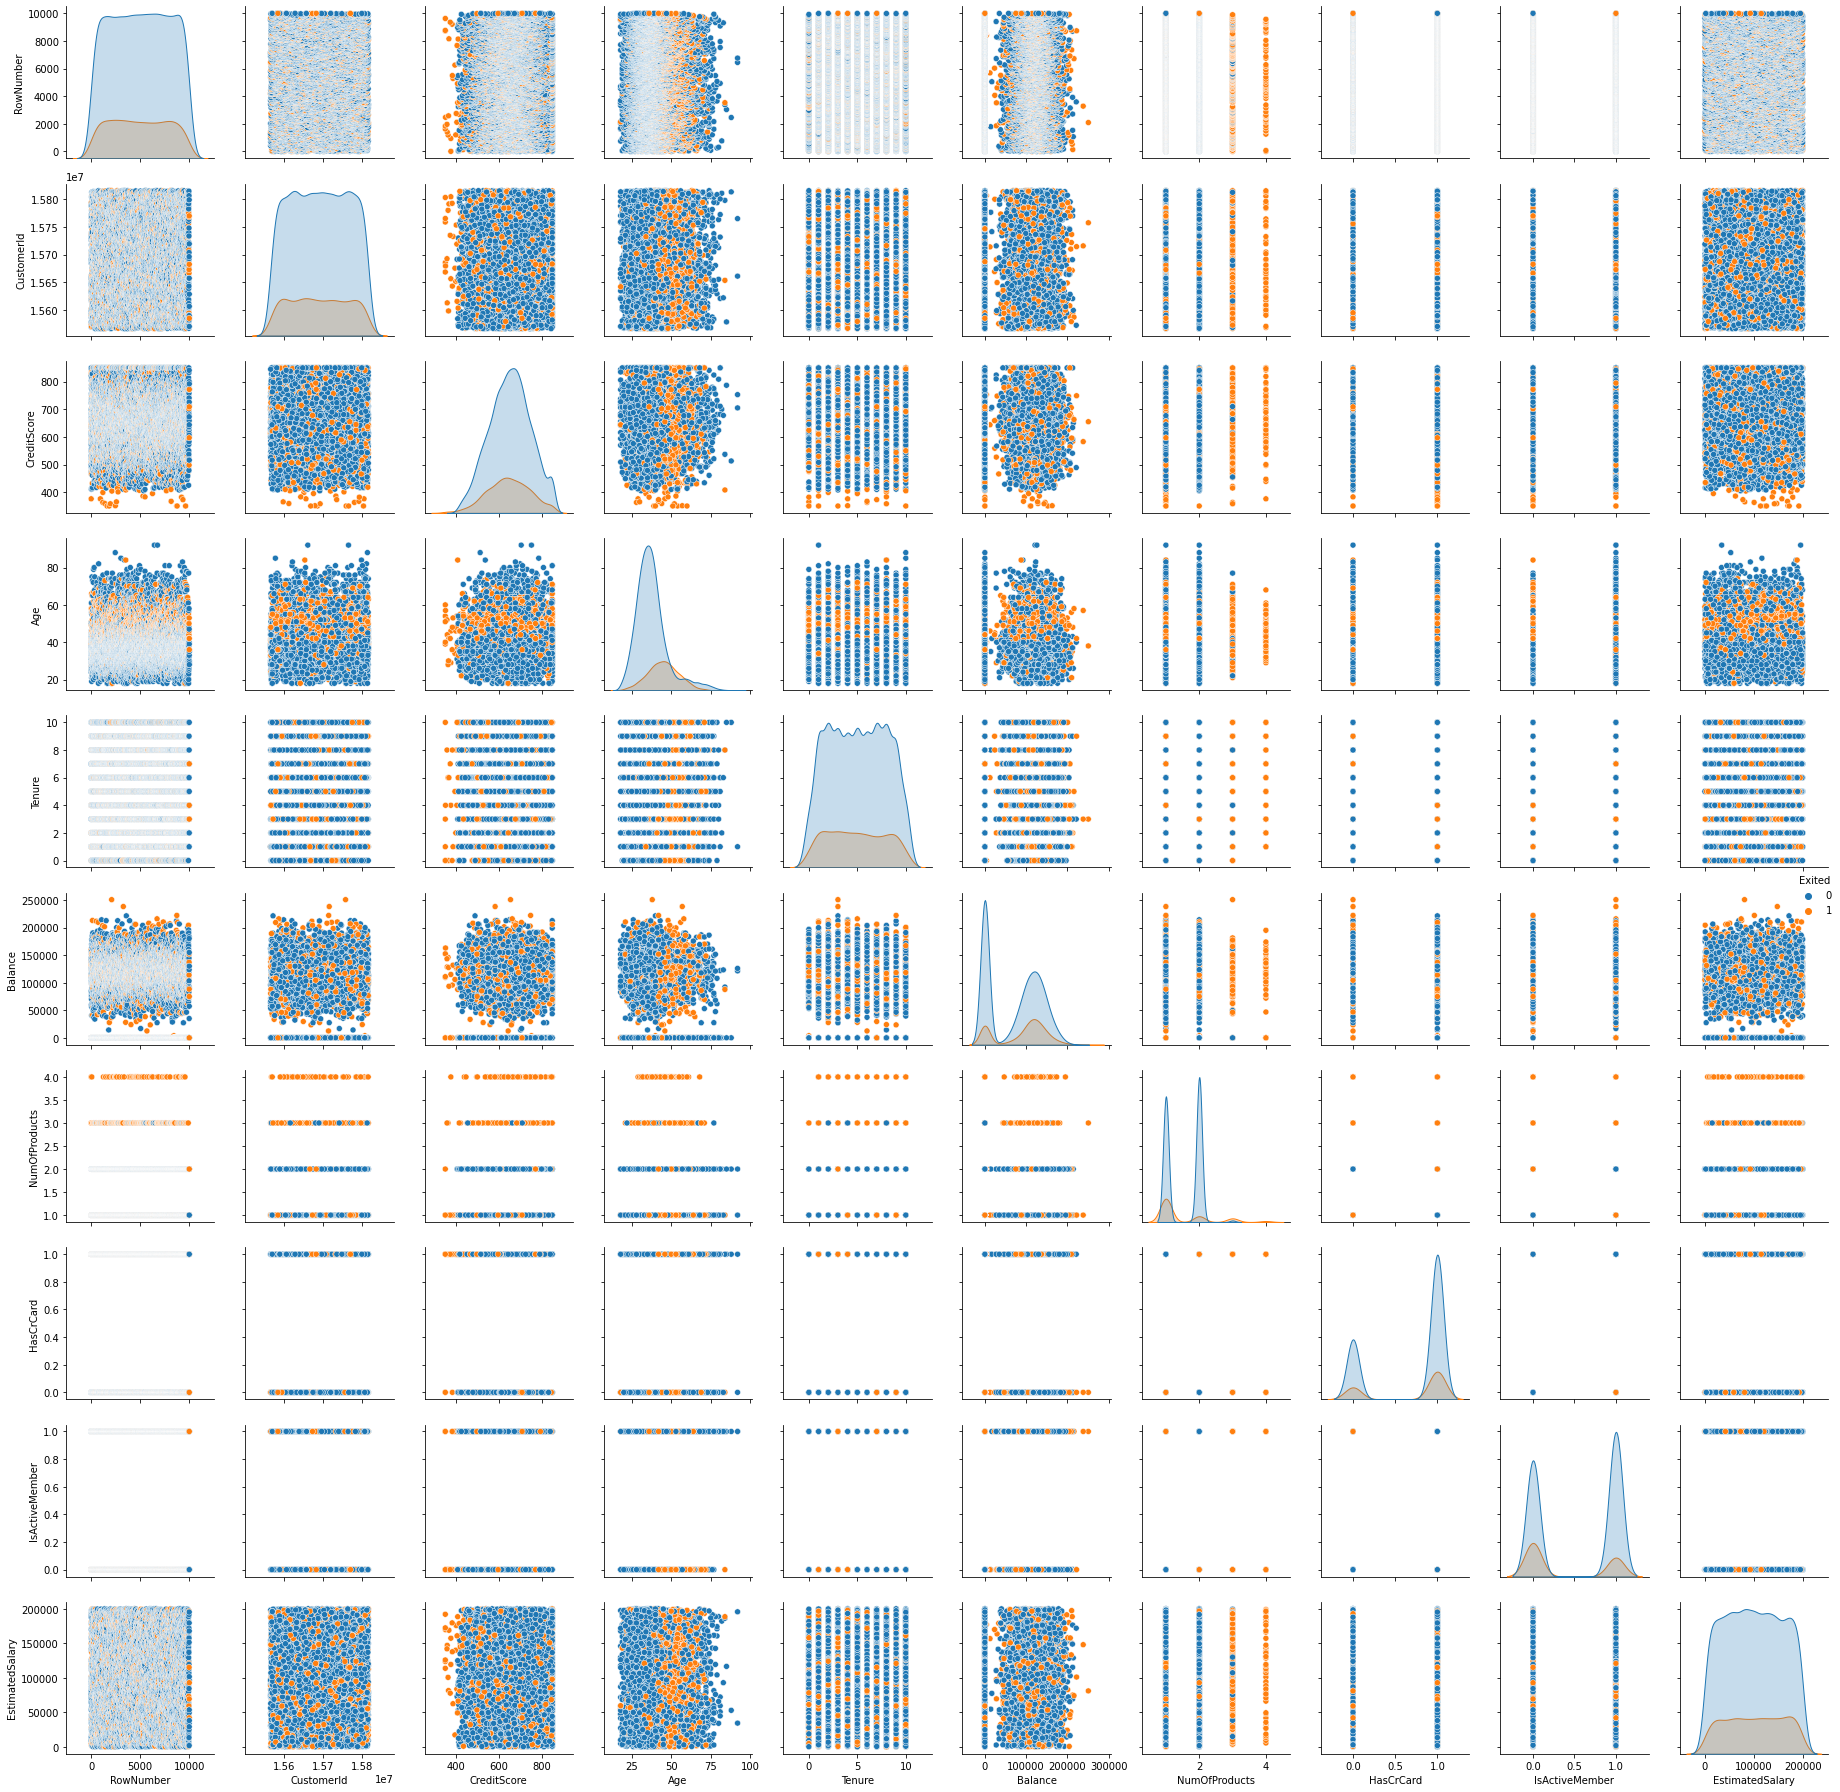

In [7]:
sns.pairplot(data, hue='Exited')
plt.tight_layout() # убираем служебную информацию

In [8]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

### Предобработка данных

#### Стиль загаловков

In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
data = data.rename(columns=str.lower)

In [11]:
data = data.rename(columns={'rownumber' : 'row_number', 'customerid' : 'customer_id', 'creditscore' : 'credit_score', 'numofproducts' : 'num_of_products', 'hascrcard' : 'has_cr_card',
                           'isactivemember' : 'is_active_member', 'estimatedsalary' : 'estimated_salary'})

In [12]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


#### Проверим пропуски

In [13]:
data.isnull().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

#### Процент пропусков

In [14]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

row_number - 0%
customer_id - 0%
surname - 0%
credit_score - 0%
geography - 0%
gender - 0%
age - 0%
tenure - 9%
balance - 0%
num_of_products - 0%
has_cr_card - 0%
is_active_member - 0%
estimated_salary - 0%
exited - 0%


Колличество пропусков в tenure почти 10% лучше их заполнить

#### Проверим явные дубликаты

In [15]:
data.duplicated().sum() 

0

#### Заполним пропуски в tenure на 0

In [16]:
data['tenure'] = data['tenure'].fillna(0)

In [17]:
data.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

### Удалим row_number, customer_id, surname из-за их потенциально низкой значимости для модели

In [18]:
data = data.drop(columns=['row_number', 'customer_id', 'surname'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


### Переработаем поля типа object методом OHE

In [19]:
cat_columns = data.select_dtypes('object').columns

ohe = OneHotEncoder(sparse=False)
data_ohe = ohe.fit_transform(data[cat_columns])

In [20]:
data_ohe = pd.DataFrame(data_ohe, columns=ohe.get_feature_names())
data_ohe

,x0_France,x0_Germany,x0_Spain,x1_Female,x1_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [21]:
ohe = OneHotEncoder(sparse=False, drop='first')
data_ohe = ohe.fit_transform(data[cat_columns])
data_ohe = pd.DataFrame(data_ohe, columns=ohe.get_feature_names())
data_ohe

,x0_Germany,x0_Spain,x1_Male
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,0.0,0.0,1.0
9997,0.0,0.0,0.0
9998,1.0,0.0,1.0


In [22]:
data[ohe.get_feature_names()] = data_ohe 
data.drop(columns=cat_columns, inplace=True)
data = data.rename(columns=str.lower) # приводим к нижнему регистру

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  float64
 3   balance           10000 non-null  float64
 4   num_of_products   10000 non-null  int64  
 5   has_cr_card       10000 non-null  int64  
 6   is_active_member  10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   exited            10000 non-null  int64  
 9   x0_germany        10000 non-null  float64
 10  x0_spain          10000 non-null  float64
 11  x1_male           10000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


# Исследуем баланс классов

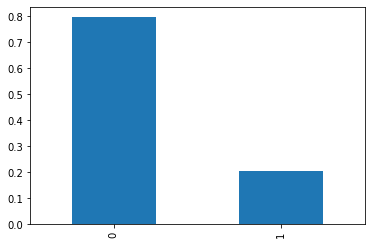

In [24]:
class_frequency = data['exited'].value_counts(normalize = True).plot(kind='bar')

**Вывод**
В данных очевиден дисбаланс в сторону отрицательного класса

# Тестируем модели без учета дисбаланса

## Разобьем данные на выборки

In [25]:
target = data['exited']
features = data.drop('exited', axis=1)


In [26]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target,
                                                                                        test_size=0.50, random_state=42)

In [27]:

features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 7660 to 7270
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      5000 non-null   int64  
 1   age               5000 non-null   int64  
 2   tenure            5000 non-null   float64
 3   balance           5000 non-null   float64
 4   num_of_products   5000 non-null   int64  
 5   has_cr_card       5000 non-null   int64  
 6   is_active_member  5000 non-null   int64  
 7   estimated_salary  5000 non-null   float64
 8   x0_germany        5000 non-null   float64
 9   x0_spain          5000 non-null   float64
 10  x1_male           5000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 468.8 KB


In [28]:

target_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 5000 entries, 7660 to 7270
Series name: exited
Non-Null Count  Dtype
--------------  -----
5000 non-null   int64
dtypes: int64(1)
memory usage: 78.1 KB


In [29]:

features_valid_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 6252 to 2764
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      5000 non-null   int64  
 1   age               5000 non-null   int64  
 2   tenure            5000 non-null   float64
 3   balance           5000 non-null   float64
 4   num_of_products   5000 non-null   int64  
 5   has_cr_card       5000 non-null   int64  
 6   is_active_member  5000 non-null   int64  
 7   estimated_salary  5000 non-null   float64
 8   x0_germany        5000 non-null   float64
 9   x0_spain          5000 non-null   float64
 10  x1_male           5000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 468.8 KB


In [30]:
#data_test.info()
target_valid_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 5000 entries, 6252 to 2764
Series name: exited
Non-Null Count  Dtype
--------------  -----
5000 non-null   int64
dtypes: int64(1)
memory usage: 78.1 KB


In [31]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test,
                                                                                        test_size=0.50, random_state=42)

In [32]:
features_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 5728 to 9115
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      2500 non-null   int64  
 1   age               2500 non-null   int64  
 2   tenure            2500 non-null   float64
 3   balance           2500 non-null   float64
 4   num_of_products   2500 non-null   int64  
 5   has_cr_card       2500 non-null   int64  
 6   is_active_member  2500 non-null   int64  
 7   estimated_salary  2500 non-null   float64
 8   x0_germany        2500 non-null   float64
 9   x0_spain          2500 non-null   float64
 10  x1_male           2500 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 234.4 KB


In [33]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 3429 to 9106
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      2500 non-null   int64  
 1   age               2500 non-null   int64  
 2   tenure            2500 non-null   float64
 3   balance           2500 non-null   float64
 4   num_of_products   2500 non-null   int64  
 5   has_cr_card       2500 non-null   int64  
 6   is_active_member  2500 non-null   int64  
 7   estimated_salary  2500 non-null   float64
 8   x0_germany        2500 non-null   float64
 9   x0_spain          2500 non-null   float64
 10  x1_male           2500 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 234.4 KB


In [34]:
target_valid.info()

<class 'pandas.core.series.Series'>
Int64Index: 2500 entries, 5728 to 9115
Series name: exited
Non-Null Count  Dtype
--------------  -----
2500 non-null   int64
dtypes: int64(1)
memory usage: 39.1 KB


In [35]:
target_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 2500 entries, 3429 to 9106
Series name: exited
Non-Null Count  Dtype
--------------  -----
2500 non-null   int64
dtypes: int64(1)
memory usage: 39.1 KB


### Создадим все необходимые срезы

### Стандартизируем численные данные

In [36]:
numeric = ['credit_score', 'age', 'tenure', 'num_of_products', 'estimated_salary', 'balance', 'has_cr_card', 'is_active_member']

In [37]:
scaler = MinMaxScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


In [38]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_germany,x0_spain,x1_male
7660,0.216,0.272727,0.5,0.000000,0.333333,1.0,0.0,0.398529,0.0,1.0,1.0
275,0.712,0.287879,0.0,0.000000,0.333333,1.0,1.0,0.554547,0.0,1.0,0.0
2985,0.980,0.181818,0.8,0.543215,0.000000,1.0,0.0,0.270361,0.0,0.0,1.0
5646,0.352,0.257576,0.9,0.472448,0.000000,1.0,0.0,0.204639,1.0,0.0,0.0
5849,0.630,0.500000,0.2,0.000000,0.000000,0.0,0.0,0.266557,0.0,0.0,1.0


In [39]:
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_germany,x0_spain,x1_male
5728,0.702,0.348485,1.0,0.000000,0.333333,1.0,1.0,0.731500,0.0,0.0,1.0
6249,0.710,0.454545,0.0,0.000000,0.333333,0.0,0.0,0.749090,0.0,0.0,0.0
8069,0.534,0.393939,0.9,0.195925,0.333333,1.0,0.0,0.266261,1.0,0.0,1.0
3924,0.606,0.333333,0.0,0.000000,0.333333,1.0,0.0,0.178690,0.0,0.0,0.0
3209,0.350,0.121212,0.7,0.612378,0.000000,1.0,1.0,0.315824,0.0,0.0,1.0


In [40]:
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_germany,x0_spain,x1_male
3429,0.762,0.378788,0.9,0.315348,0.000000,0.0,0.0,0.002294,1.0,0.0,0.0
7774,1.000,0.378788,0.5,0.515369,0.333333,0.0,1.0,0.095859,1.0,0.0,1.0
8179,0.520,0.136364,0.9,0.635963,0.000000,0.0,1.0,0.516924,0.0,0.0,0.0
705,0.800,0.333333,0.5,0.670738,0.666667,1.0,0.0,0.101902,1.0,0.0,1.0
9134,0.262,0.333333,0.3,0.000000,0.000000,1.0,1.0,0.161295,0.0,0.0,1.0


## Протестируем модель DecisionTreeClassifier

In [41]:
modeltree = DecisionTreeClassifier(random_state=42)

In [42]:
params = {'max_depth': range(1, 25) , 
          'min_samples_split': range(3, 20),
          'min_samples_leaf': range(3, 20),
            }

grid_model_tree = GridSearchCV(modeltree, params, cv=3,
                          scoring='f1', n_jobs=-1)

grid_model_tree.fit(features_train, target_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 25),
                         'min_samples_leaf': range(3, 20),
                         'min_samples_split': range(3, 20)},
             scoring='f1')

In [43]:
grid_model_tree.best_score_

0.5756922712919883

In [44]:
preds_tree = grid_model_tree.predict(features_valid)

In [45]:
f1_score(target_valid, preds_tree)

0.5443349753694581

## Протестируем модель RandomForestClassifier

In [46]:
modelforest = RandomForestClassifier(random_state=42)

In [47]:
params = {'max_depth': range(1, 25) , 
          'n_estimators':[5,20, 25],
          'min_samples_split':[2, 6, 10],
          'min_samples_leaf':[1, 3, 4],
           'bootstrap': [True, False],
            }

grid_model_forest = GridSearchCV(modelforest, params, cv=3,
                          scoring='f1', n_jobs=-1)

grid_model_forest.fit(features_train, target_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': range(1, 25),
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 25]},
             scoring='f1')

In [48]:
grid_model_forest.best_score_

0.5856007143374945

In [49]:
preds_forest = grid_model_forest.predict(features_valid)

In [50]:
f1_score(target_valid, preds_forest)

0.5644768856447689

## Протестируем модель LogisticRegression

In [51]:
modelregr = LogisticRegression(random_state=42)

In [52]:
params = {
          'C': np.logspace(-4, 4, 50),
           'max_iter': [200, 500]
    
          
            }

grid_model_regr = GridSearchCV(modelregr, params, cv=3,
                          scoring='f1', n_jobs=-1)

grid_model_regr.fit(features_train, target_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'max_iter': [200, 500]},
             scoring='f1')

In [53]:
grid_model_regr.best_score_ 

0.33147664956231854

In [54]:
preds = grid_model_regr.predict(features_valid)

In [55]:
f1_score(target_valid, preds)

0.27719821162444114

**Вывод**
Без учета дисбаланса модели показывают низкий f1. Самый высокая метрика у модели Random Forest - 0.5644768856447689

## Протестируем модель RandomForestClassifier c учетом веса классов

In [56]:
model_forest_balanced = RandomForestClassifier(random_state=42)

In [57]:
params = {'max_depth': range(1, 20) , 
          'n_estimators':[20, 40, 500],
          'min_samples_split':[2, 6, 10],
          'min_samples_leaf':[1, 3, 20],
           'bootstrap': [True, False],
       
          
            }

grid_model_forest_balanced = GridSearchCV(model_forest_balanced, params, cv=3,
                          scoring='f1', n_jobs=-1)

grid_model_forest_balanced.fit(features_train, target_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': range(1, 20),
                         'min_samples_leaf': [1, 3, 20],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [20, 40, 500]},
             scoring='f1')

In [58]:
grid_model_forest_balanced.best_score_

0.588604298285556

In [59]:
preds_forest_balanced = grid_model_forest_balanced.predict(features_valid)

In [60]:
f1_score(target_valid, preds_forest_balanced)

0.5682382133995038

## Upsampling

In [61]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

## Проверим дисбаланс

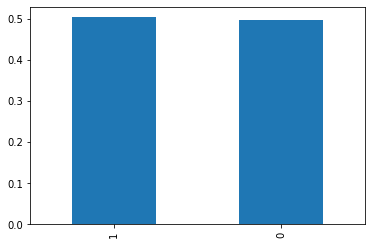

In [62]:
class_frequency = target_upsampled.value_counts(normalize = True).plot(kind='bar')


In [63]:
model_forest_upsampled = RandomForestClassifier(random_state=42)

In [64]:
params = {'max_depth': range(1, 25) , 
          'n_estimators':[5,20, 25],
          'min_samples_split':[2, 6, 10],
          'min_samples_leaf':[1, 3, 4],
           'bootstrap': [True, False],
            }

grid_model_forest_upsampled = GridSearchCV(model_forest_upsampled, params, cv=3,
                          scoring='f1', n_jobs=-1)

grid_model_forest_upsampled.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': range(1, 25),
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 25]},
             scoring='f1')

In [65]:
grid_model_forest_upsampled.best_score_

0.9594811694213293

In [66]:
preds_forest_up = grid_model_forest_upsampled.predict(features_valid)

In [67]:
f1_score(target_valid, preds_forest_up)

0.5565217391304348

## Downsampling

In [68]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

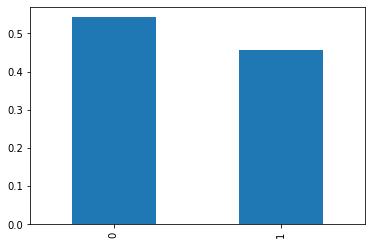

In [69]:
class_frequency = target_downsampled.value_counts(normalize = True).plot(kind='bar')

In [70]:
model_forest_down = RandomForestClassifier(random_state=42)

In [71]:
params = {'max_depth': range(1, 25) , 
          'n_estimators':[5,20, 25],
          'min_samples_split':[2, 6, 10],
          'min_samples_leaf':[1, 3, 4],
           'bootstrap': [True, False],
            }

grid_model_forest_down = GridSearchCV(model_forest_down, params, cv=3,
                          scoring='f1', n_jobs=-1)

grid_model_forest_down.fit(features_downsampled, target_downsampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': range(1, 25),
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 25]},
             scoring='f1')

In [72]:
grid_model_forest_down.best_score_

0.7506192142154288

In [73]:
preds_forest_down = grid_model_forest_down.predict(features_valid)

In [74]:
f1_score(target_valid, preds_forest_down)

0.5666387259010897

## Проверим Сбалансированый Random Forest на тестовой выборке

In [75]:
preds_forest_balanced_test = grid_model_forest_balanced.predict(features_test)

In [76]:
f1_score(target_test, preds_forest_balanced_test)

0.5871121718377088

## Посчитаем auc-roc

In [77]:
model_forest_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')

In [78]:
params = {'max_depth': range(1, 20) , 
          'n_estimators':[20, 40, 500],
          'min_samples_split':[2, 6, 10],
          'min_samples_leaf':[1, 3, 20],
           'bootstrap': [True, False],
       
          
            }

grid_model_forest_balanced = GridSearchCV(model_forest_balanced, params, cv=3,
                          scoring='roc_auc', n_jobs=-1)

grid_model_forest_balanced.fit(features_train, target_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': range(1, 20),
                         'min_samples_leaf': [1, 3, 20],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [20, 40, 500]},
             scoring='roc_auc')

In [79]:
grid_model_forest_balanced.best_score_

0.8610840578704823

In [80]:
preds_forest_balanced = grid_model_forest_balanced.predict(features_valid)

In [81]:
roc_auc_score(target_valid, preds_forest_balanced)

0.7516879429230027

In [82]:
preds_forest_balanced_test = grid_model_forest_balanced.predict(features_test)

In [83]:
roc_auc_score(target_test, preds_forest_balanced_test)

0.7645157925642055

**Общий вывод**

При балансировке классов показатели f1 и roc-auc значительно выше
f1 на тестовой выборке 0.6130653266331658
roc-auc 0.7645157925642055